# Visualization

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [227]:
data = pd.read_csv('dos_dedupe.csv', index_col=0)

In [228]:
data.head()

,Title,congress_num,Legislation Number,URL,Date of Introduction,Latest Action Date,Sponsor,Number of Cosponsors,Committees,allsubjects,...,passed,officehistorian,tag_reform,tag_financial,financial type,tag_workforce,tag_foreign,tag_aid,tag_dod,tag_other
0,A bill to amend Section 235 of the Foreign Rel...,102,S. 2488,https://www.congress.gov/bill/102nd-congress/s...,3/26/92,3/26/92,"Pell, Claiborne [Sen.-D-RI]",0,Senate - Foreign Relations,"Appropriations, Cultural relations, Education,...",...,False,False,False,True,DOS,False,True,False,False,False
1,A bill to amend the Arctic Research and Policy...,101,S. 677,https://www.congress.gov/bill/101st-congress/s...,3/17/89,11/16/90,"Murkowski, Frank H. [Sen.-R-AK]",1,"House - Science, Space and Technology | Senate...","Administrative procedure, Arctic and polar reg...",...,False,False,True,False,NaN,False,False,False,False,False
2,A bill to amend the Central Intelligence Agenc...,116,S. 4973,https://www.congress.gov/bill/116th-congress/s...,12/8/20,12/8/20,"Collins, Susan M. [Sen.-R-ME]",9,Senate - Homeland Security and Governmental Af...,Armed Forces and National Security,...,False,False,False,True,DOS,True,False,False,False,False
3,A bill to amend the Department of State Approp...,93,S. 3119,https://www.congress.gov/bill/93rd-congress/se...,3/6/74,3/6/74,"Sparkman, John J. [Sen.-D-AL]",0,Senate - Foreign Relations,"Appropriations, Department of State, Economics...",...,False,True,False,True,DOS,True,False,False,False,False
4,A bill to amend the Department of State Approp...,93,S. 2872,https://www.congress.gov/bill/93rd-congress/se...,1/21/74,1/21/74,"Fulbright, James [Sen.-D-AR]",0,Senate - Foreign Relations,"Appropriations, Department of State, Economics...",...,False,True,False,True,DOS,False,False,False,False,False


## Parse out years of introduction
By first year of congress

In [232]:
dates = pd.DataFrame({'congress_num':range(50,119),
              'year':range(1887,2024,2)})

In [234]:
data = data.merge(dates, on='congress_num')
data.head()

,Title,congress_num,Legislation Number,URL,Date of Introduction,Latest Action Date,Sponsor,Number of Cosponsors,Committees,allsubjects,...,officehistorian,tag_reform,tag_financial,financial type,tag_workforce,tag_foreign,tag_aid,tag_dod,tag_other,year
0,A bill to amend Section 235 of the Foreign Rel...,102,S. 2488,https://www.congress.gov/bill/102nd-congress/s...,3/26/92,3/26/92,"Pell, Claiborne [Sen.-D-RI]",0,Senate - Foreign Relations,"Appropriations, Cultural relations, Education,...",...,False,False,True,DOS,False,True,False,False,False,1991
1,A bill to amend the Foreign Relations Authoriz...,102,S. 2503,https://www.congress.gov/bill/102nd-congress/s...,3/31/92,3/31/92,"Simon, Paul [Sen.-D-IL]",5,Senate - Appropriations,"Authorization, Budget deficits, Federal budget...",...,True,False,True,DOS,False,True,False,False,False,1991
2,A bill to amend the Foreign Service Act of 198...,102,S. 3275,https://www.congress.gov/bill/102nd-congress/s...,9/25/92,11/24/92,"Pell, Claiborne [Sen.-D-RI]",0,"House - Foreign Affairs, Post Office and Civil...","Annuities, Civil service retirement, Criminal ...",...,False,False,False,NaN,True,False,False,False,False,1991
3,A joint resolution relative to telephone rates...,102,S.J.Res. 77,https://www.congress.gov/bill/102nd-congress/s...,2/21/91,4/29/91,"Dole, Robert J. [Sen.-R-KS]",27,"House - Energy and Commerce, Foreign Affairs |...","Armed forces abroad, Government Operations and...",...,False,False,False,NaN,True,False,False,False,False,1991
4,"Departments of Commerce, Justice, and State, t...",102,H.R. 2608,https://www.congress.gov/bill/102nd-congress/h...,6/11/91,10/28/91,"Smith, Neal Edward [Rep.-D-IA-4]",0,House - Appropriations | Senate - Appropriations,"Abortion, Administration of justice, Administr...",...,False,False,True,DOS,False,False,False,False,False,1991


In [236]:
data['year/congress'] = [str(i) + " (" + str(j) + ")" for i, j in zip(data.congress_num, data.year)]
data['year/congress']

0      102 (1991)
1      102 (1991)
2      102 (1991)
3      102 (1991)
4      102 (1991)
          ...    
466    111 (2009)
467    111 (2009)
468    111 (2009)
469    103 (1993)
470    103 (1993)
Name: year/congress, Length: 471, dtype: object

In [205]:
# other method 
# data['year'] = [string.split('/')[2] if string!='-' else '' for string in data['Date of Introduction']]
# data['year'][data['Date of Introduction']=='-'] = [string.split('/')[2] for string in data['Latest Action Date']]

# for index, year in enumerate(data['year']):
#     if int(year)>24: data['year'][index] = '19'+year
#     else:
#         data['year'][index] = '20'+year

/var/folders/js/7x9j4wbs6nj983t_k4_l9x5r0000gn/T/ipykernel_62247/1871959455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][data['Date of Introduction']=='-'] = [string.split('/')[2] for string in data['Latest Action Date']]


## Get Congress parties

In [237]:
congress_parties = pd.read_csv('congress_parties.csv')
congress_parties['congress_num'] = congress_parties.Congress.str.extract(r'(\d*)[a-z]*').astype(int)
congress_parties.head()

,Congress,Years,Senate total,Senate dems,Senate rep,Senate majority,HOR total,HOR dems,HOR reps,HOR majority,Congress majority,President,President party,Trifecta,Trifecta party,congress_num
0,35th,1857–1859,64,39,20,D,237,131,94,D,D,James Buchanan,D,Yes,D,35
1,36th,1859–1861,66,38,26,D,237,101,113,R,-,James Buchanan,D,No,-,36
2,37th,1861–1863,50,11,31,R,178,42,106,R,R,Abraham Lincoln[12],R,Yes,R,37
3,38th,1863–1865,51,12,29,R,183,80,103,R,R,Abraham Lincoln[12],R,Yes,R,38
4,39th,1865–1867,52,10,42,R,191,46,145,R,R,Andrew Johnson[13],R,-,-,39


In [238]:
data = data.merge(congress_parties[['congress_num','Senate majority','HOR majority',
                                       'Congress majority','President party','Trifecta party']], 
                       how='inner', left_on='congress_num', right_on='congress_num')
data.head(4)

,Title,congress_num,Legislation Number,URL,Date of Introduction,Latest Action Date,Sponsor,Number of Cosponsors,Committees,allsubjects,...,tag_aid,tag_dod,tag_other,year,year/congress,Senate majority,HOR majority,Congress majority,President party,Trifecta party
0,A bill to amend Section 235 of the Foreign Rel...,102,S. 2488,https://www.congress.gov/bill/102nd-congress/s...,3/26/92,3/26/92,"Pell, Claiborne [Sen.-D-RI]",0,Senate - Foreign Relations,"Appropriations, Cultural relations, Education,...",...,False,False,False,1991,102 (1991),D,D,D,R,-
1,A bill to amend the Foreign Relations Authoriz...,102,S. 2503,https://www.congress.gov/bill/102nd-congress/s...,3/31/92,3/31/92,"Simon, Paul [Sen.-D-IL]",5,Senate - Appropriations,"Authorization, Budget deficits, Federal budget...",...,False,False,False,1991,102 (1991),D,D,D,R,-
2,A bill to amend the Foreign Service Act of 198...,102,S. 3275,https://www.congress.gov/bill/102nd-congress/s...,9/25/92,11/24/92,"Pell, Claiborne [Sen.-D-RI]",0,"House - Foreign Affairs, Post Office and Civil...","Annuities, Civil service retirement, Criminal ...",...,False,False,False,1991,102 (1991),D,D,D,R,-
3,A joint resolution relative to telephone rates...,102,S.J.Res. 77,https://www.congress.gov/bill/102nd-congress/s...,2/21/91,4/29/91,"Dole, Robert J. [Sen.-R-KS]",27,"House - Energy and Commerce, Foreign Affairs |...","Armed forces abroad, Government Operations and...",...,False,False,False,1991,102 (1991),D,D,D,R,-


## Passed bills

In [239]:
# all bills / passed bills
print(str(data[data['passed']==True].shape[0]) + ' / ' + str(data.shape[0]))

97 / 471


In [240]:
97/471*100

20.59447983014862

## Tags

In [312]:
data[data['tag_financial']==False].shape[0]

161

In [316]:
tag_agg = pd.DataFrame(data[['tag_financial', 'tag_reform', 'tag_workforce', 'tag_aid', 'tag_foreign', 'tag_other']].agg('sum')).reset_index()
tag_agg = tag_agg.rename(columns={'index':'tag', 0:'count'})

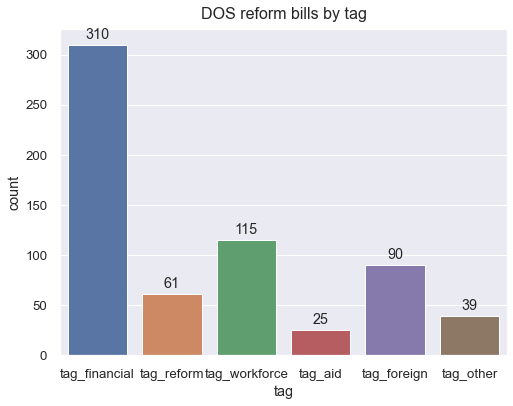

In [317]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=tag_agg, x='tag', y='count')
for container in plot.containers:
    plot.bar_label(container, padding=3)
plot.set_title("DOS reform bills by tag", fontsize=16, pad=10);

In [318]:
tag_agg_passed = pd.DataFrame(data[data.passed==True][['tag_financial', 'tag_reform', 'tag_workforce', 'tag_aid', 'tag_foreign', 'tag_other']]
                              .agg('sum')).reset_index()
tag_agg_passed = tag_agg_passed.rename(columns={'index':'tag', 0:'count'})
tag_agg_passed

,tag,count
0,tag_financial,79
1,tag_reform,12
2,tag_workforce,13
3,tag_aid,1
4,tag_foreign,8
5,tag_other,8


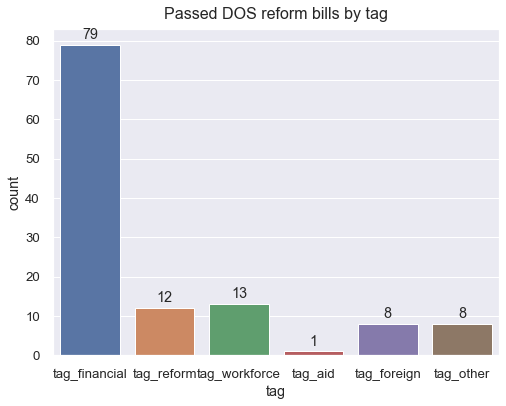

In [319]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=tag_agg_passed, x='tag', y='count')
for container in plot.containers:
    plot.bar_label(container, padding=3)
plot.set_title("Passed DOS reform bills by tag", fontsize=16, pad=10);

In [320]:
x = tag_agg.merge(tag_agg_passed, on='tag')
x

,tag,count_x,count_y
0,tag_financial,310,79
1,tag_reform,61,12
2,tag_workforce,115,13
3,tag_aid,25,1
4,tag_foreign,90,8
5,tag_other,39,8


In [321]:
sum(x.count_x[1:])

330

''

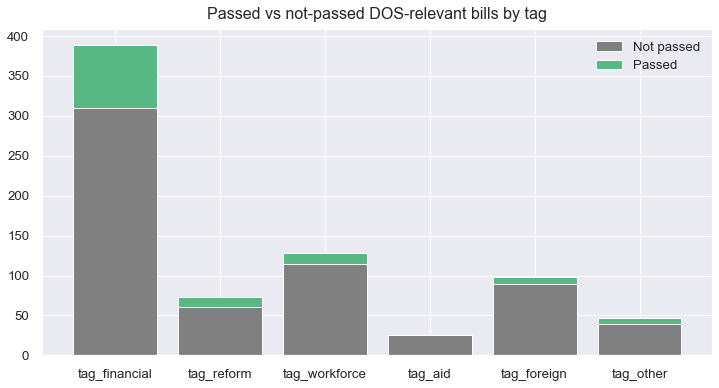

In [322]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set(font_scale=1.2)
plt.bar(x['tag'], x['count_x'], color='gray')
plt.bar(x['tag'], x['count_y'], bottom=x['count_x'], color='#57b884')
# plt.xticks(range(92,119))
plot.set_xlabel('Congress')
plot.set_ylabel('Count')
plt.legend(["Not passed", "Passed"])
plt.title("Passed vs not-passed DOS-relevant bills by tag", fontsize=16, pad=10)
plt.style.use("seaborn-pastel") 
;

## bills by Congress

In [273]:
bills_grouped = data.groupby('year/congress', as_index=False).agg({'year/congress' : ['first', 'count'], 
                                                                   'congress_num': 'first',
                                                                  'passed' : ['sum'], 
                                                                  'Congress majority': 'first', 
                                                                  'President party': 'first'})
bills_grouped.columns = ['_'.join(col) for col in bills_grouped.columns]
bills_grouped = bills_grouped.sort_values('congress_num_first')
bills_grouped['notpassed'] = bills_grouped['year/congress_count'] - bills_grouped['passed_sum']
bills_grouped_limit = bills_grouped[bills_grouped.congress_num_first>92]
bills_grouped.head(3)

,year/congress_first,year/congress_count,congress_num_first,passed_sum,Congress majority_first,President party_first,notpassed
19,82 (1951),2,82,2,D,D,0
20,83 (1953),5,83,5,R,R,0
21,84 (1955),5,84,5,D,R,0


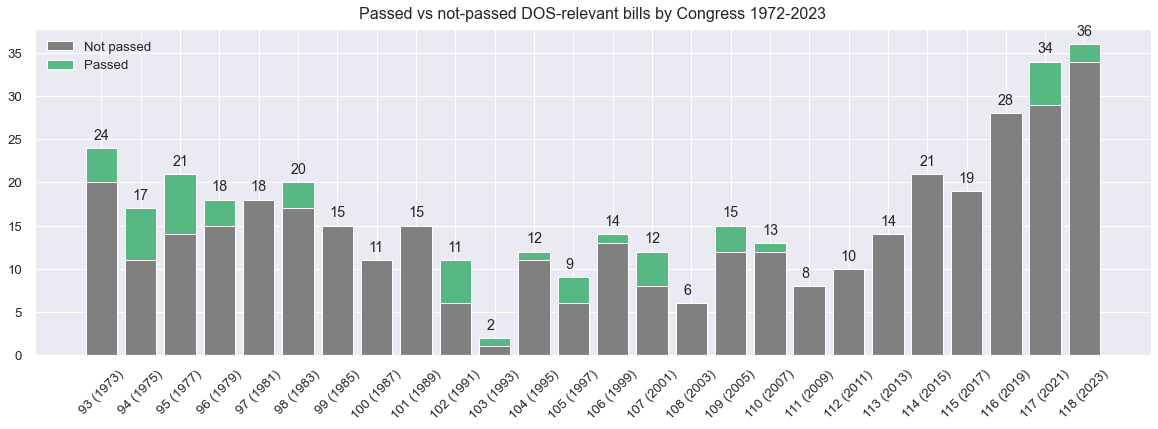

In [286]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.set(font_scale=1.2)
plt.bar(bills_grouped_limit['year/congress_first'], bills_grouped_limit['notpassed'], color='gray')
plt.bar(bills_grouped_limit['year/congress_first'], bills_grouped_limit['passed_sum'], bottom=bills_grouped_limit['notpassed'], color='#57b884')
# plt.xticks(range(92,119))
plot.set_xlabel('Congress (year)')
plot.set_ylabel('Count')
plt.legend(["Not passed", "Passed"])
plt.title("Passed vs not-passed DOS-relevant bills by Congress 1972-2023", fontsize=16, pad=10)
plt.style.use("seaborn-pastel") 
plt.xticks(rotation=45) 
for i, v in enumerate(bills_grouped_limit['year/congress_count']):
    plt.text(i-.2, v+1, str(v));

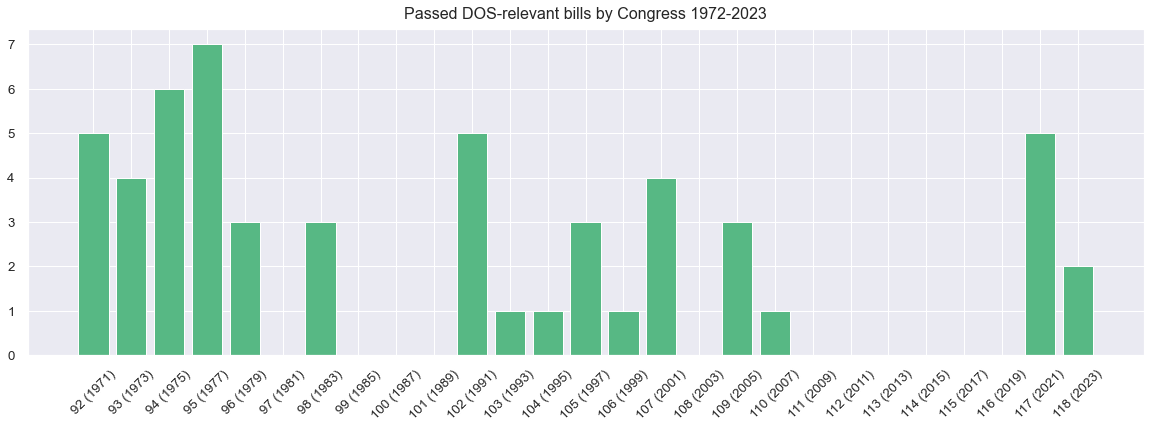

In [270]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.set(font_scale=1.2)
plt.bar(bills_grouped_limit['year/congress_first'], bills_grouped_limit['passed_sum'], color='#57b884')
# plt.xticks(range(92,119))
plot.set_xlabel('Congress (year)')
plot.set_ylabel('Count')
plt.title("Passed DOS-relevant bills by Congress 1972-2023", fontsize=16, pad=10)
plt.style.use("seaborn-pastel") 
for container in plot.containers:
    plot.bar_label(container, padding=3)
plt.xticks(rotation=45) ;
# for i, v in enumerate(bills_grouped_limit['passed_sum']):
#     plt.text(i-.1, v+.1, str(v));

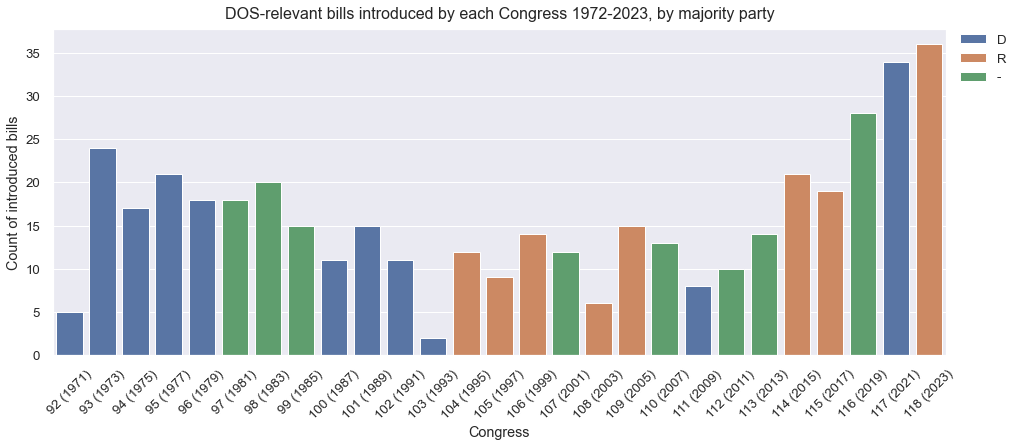

In [315]:
# INTRODUCED BILLS

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=bills_grouped[bills_grouped.congress_num_first>91], 
                   y='year/congress_count', x='year/congress_first', dodge=False,
                   hue='Congress majority_first', hue_order=['D','R','-'])
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plot.set_xlabel('Congress')
plot.set_ylabel('Count of introduced bills')
# for container in plot.containers:
#     plot.bar_label(container, padding=3)
plot.set_title("DOS-relevant bills introduced by each Congress 1972-2023, by majority party", fontsize=16, pad=10)
plt.xticks(rotation=45) ;

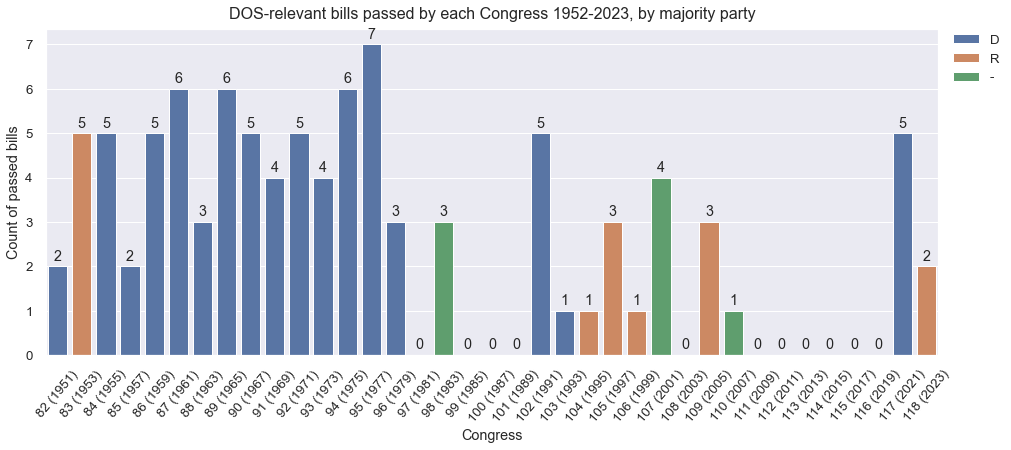

In [254]:
# PASSED BILLS

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=bills_grouped, 
                   y='passed_sum', x='year/congress_first', dodge=False,
                   hue='Congress majority_first', hue_order=['D','R','-'])
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plot.set_xlabel('Congress')
plot.set_ylabel('Count of passed bills')
for container in plot.containers:
    plot.bar_label(container, padding=3)
plot.set_title("DOS-relevant bills passed by each Congress 1952-2023, by majority party", fontsize=16, pad=10)
plt.xticks(rotation=50) ;

## DOS bills by Congress 1971-2024 (92-118)

In [18]:
bills_grouped = data.groupby('congress_num', as_index=False).agg({'congress_num' : ['first', 'count'], 
                                                                  'passed' : ['sum'], 
                                                                  'Congress majority': 'first', 
                                                                  'President party': 'first',
                                                                  'Trifecta party': 'first'})
bills_grouped.columns = ['_'.join(col) for col in bills_grouped.columns]
bills_grouped = bills_grouped[bills_grouped.congress_num_first > 91]
bills_grouped.head(3)

,congress_num_first,congress_num_count,passed_sum,Congress majority_first,President party_first,Trifecta party_first
10,92,5,5,D,R,-
11,93,24,4,D,R,-
12,94,17,6,D,R,-


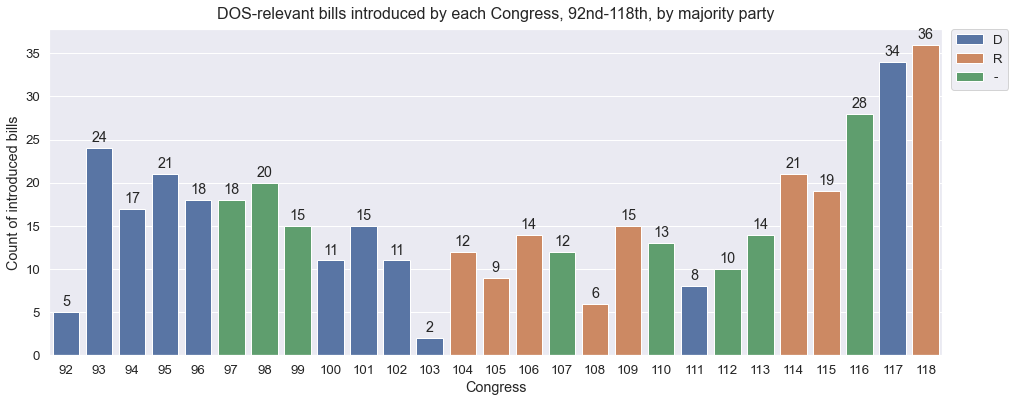

In [19]:
# INTRODUCED BILLS

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=bills_grouped, y='congress_num_count', x='congress_num_first', dodge=False,
                   hue='Congress majority_first', hue_order=['D','R','-'])
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plot.set_xlabel('Congress')
plot.set_ylabel('Count of introduced bills')
for container in plot.containers:
    plot.bar_label(container, padding=3)
plot.set_title("DOS-relevant bills introduced by each Congress, 92nd-118th, by majority party", fontsize=16, pad=10);

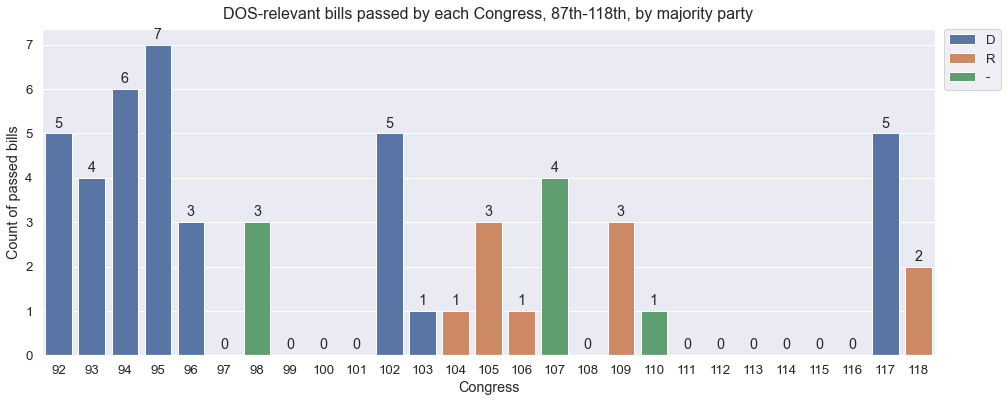

In [21]:
# PASSED BILLS

plt.figure(figsize=(16,6))
sns.set(font_scale=1.2)
plot = sns.barplot(data=bills_grouped, y='passed_sum', x='congress_num_first', dodge=False,
                   hue='Congress majority_first', hue_order=['D','R','-'])
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plot.set_xlabel('Congress')
plot.set_ylabel('Count of passed bills')
for container in plot.containers:
    plot.bar_label(container, padding=3)
plot.set_title("DOS-relevant bills passed by each Congress, 87th-118th, by majority party", fontsize=16, pad=10);